In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('iris.txt',names=['m1','m2','m3','m4','esp']) #acertar path para o dataset
df.head()

,m1,m2,m3,m4,esp
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
m1=df['m1'].mean()
m2=df['m2'].mean()
m3=df['m3'].mean()
m4=df['m4'].mean()

df['m1']=df['m1']-m1
df['m2']=df['m2']-m2
df['m3']=df['m3']-m3
df['m4']=df['m4']-m4


In [41]:
esp=df['esp'].copy()
esp=esp.map({'Iris-setosa':0,'Iris-virginica':2,'Iris-versicolor':1})
X=df.drop(columns=['esp']).copy()

In [42]:
esp

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: esp, Length: 150, dtype: int64

In [43]:
X[:5]

,m1,m2,m3,m4
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


In [44]:
C=np.cov(X.transpose())
C

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [45]:
from sklearn.decomposition import PCA #fazendo PCA com as duas principais componentes
p=PCA(2)
p.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
[4.22484077 0.24224357]
[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.58846205 -0.19739308]
 [-2.41007734  0.41808001]
 [-2.6476

As features são agora ortogonais...nada fora da diagonal princial na variância

In [47]:
np.cov(B.T)

array([[4.22484077e+00, 1.09876813e-15],
       [1.09876813e-15, 2.42243572e-01]])

Observe que a reconstrução é, obviamente, lossy.

In [58]:
p.inverse_transform(B[:5]),X[:5] #observe a proximidade nas 5 primeiras linhas de X e X reconstruído

(array([[-7.56150860e-01,  4.59156139e-01, -2.35662387e+00,
         -9.87611103e-01],
        [-1.09317805e+00,  9.96644423e-02, -2.29612529e+00,
         -9.61734436e-01],
        [-1.13510179e+00,  1.37519455e-01, -2.45119793e+00,
         -1.02673358e+00],
        [-1.19734886e+00, -1.08492284e-03, -2.29783598e+00,
         -9.62299308e-01],
        [-7.67396262e-01,  4.68147201e-01, -2.39592969e+00,
         -1.00408534e+00]]),
          m1     m2        m3        m4
 0 -0.743333  0.446 -2.358667 -0.998667
 1 -0.943333 -0.054 -2.358667 -0.998667
 2 -1.143333  0.146 -2.458667 -0.998667
 3 -1.243333  0.046 -2.258667 -0.998667
 4 -0.843333  0.546 -2.358667 -0.998667)

Cálculo da acurácia com 4 features e com 2 features



0.9733333333333334

0.9666666666666667

In [ ]:
#pouca perda...com 2 features

Vamos agora para uma das principais utilizações de PCA, visualização...já que fomo para 2D, vamos ver as 3 classes! Coisa linda!

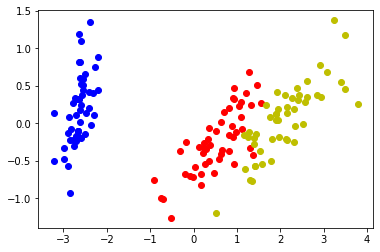